# Multiple regression with statsmodels

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
series_y = pd.Series(norm.rvs(size=42))
series_x = pd.Series(norm.rvs(size=42))

In [4]:
df = pd.DataFrame(
    {
        'x': series_x,
        'y': series_y
    }
)

In [5]:
x = sm.add_constant(df['x'])
y = df['y']

In [6]:
model = sm.OLS(
    endog=y,
    exog=x,
    missing='drop'
)
results = model.fit()

In [7]:
predicted = results.predict(x)

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4367
Date:                Sat, 19 Sep 2020   Prob (F-statistic):              0.513
Time:                        18:33:24   Log-Likelihood:                -57.376
No. Observations:                  42   AIC:                             118.8
Df Residuals:                      40   BIC:                             122.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0417      0.153     -0.273      0.786      -0.351       0.267
x              0.0914      0.138      0.661      0.513      -0.188       0.371
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.316
Skew:                          -0.238   Prob(JB):                        0.518
Kurtosis:                       2.276   Cond. No.                         1.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Y axis label')

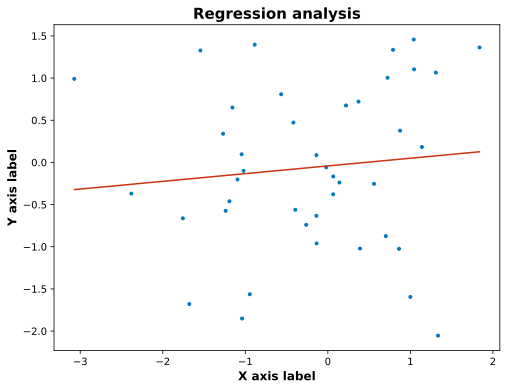

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(
    series_x,
    series_y,
    marker='.',
    linestyle='None',
    color='#0077bb'
)
ax.plot(
    series_x,
    predicted,
    marker='None',
    linestyle='-',
    color='#cc3311'
)
ax.set_title(
    label='Regression analysis',
    fontsize=15,
    fontweight='bold'
)
ax.set_xlabel(
    xlabel='X axis label',
    fontsize=12,
    fontweight='bold'
)
ax.set_ylabel(
    ylabel='Y axis label',
    fontsize=12,
    fontweight='bold'
)
# fig.savefig('y_vs_x.svg', format='svg')